In [ ]:
# Observations of Notebook for Matplotlib Homework

# Instructions: Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

# Response:

# 1. The number of mice involved in the study declines as the timepoints increase. Presumably, this is because the mice are dying before reaching Timepoint 45. (However, the information doesn't specify this anywhere.)

# 2. Nearly all of the mice in the Capomulin drug regimen remained until Timepoint 45, and it had the lowest average final tumor size of the best performing drugs. It is overall, the best performing drug in the study.

# 3. The correlation of the average tumor volume vs. weight in mice in the Capomulin regimen is 0.84, but that means that the r-squared is 0.706. That means that roughly 30% is not well represented by the best-fit line that we added the scatterplot


In [81]:
# Some lines for this cell provided by starter file

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset"
comb_df =  pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"], suffixes=("_metadata_file", "_results_file"))
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Checking the number of mice in the DataFrame.

num_mice_dirty=len(comb_df["Mouse ID"].unique())
num_mice_dirty

249

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_series = comb_df[comb_df.duplicated(["Mouse ID","Timepoint"])]

In [84]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_series

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_dup_df=comb_df.copy()

mouse_with_dup_ID, =duplicate_mice_series["Mouse ID"].unique()
mouse_with_dup_ID

'g989'

In [86]:
# This deletes all rows with Mouse ID column equal to the ID of the mouse with duplicate issues 
mouse_with_dup_index = dropped_dup_df[dropped_dup_df["Mouse ID"] == mouse_with_dup_ID].index
mouse_with_dup_index

# dropped_dup_df=comb_df
dropped_dup_df.drop(mouse_with_dup_index , inplace=True)



In [87]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean=len(dropped_dup_df["Mouse ID"].unique())
num_mice_clean

248

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_df_groups=dropped_dup_df.groupby(['Drug Regimen'])

In [89]:
ave_series=clean_df_groups["Tumor Volume (mm3)"].mean()

In [90]:
median_series=clean_df_groups["Tumor Volume (mm3)"].median()

In [91]:
var_series=clean_df_groups["Tumor Volume (mm3)"].var()

In [92]:
std_series=clean_df_groups["Tumor Volume (mm3)"].std()

In [93]:
sem_series=clean_df_groups["Tumor Volume (mm3)"].sem()

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stat_table=pd.DataFrame({'Average':ave_series,'Median':median_series,'Variance':var_series, 'Standard Deviation': std_series, 'Standard Error of the Mean': sem_series})
summary_stat_table

,Average,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Section for both of these:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Create our x_axis list
x_axis = dropped_dup_df["Timepoint"].unique()


In [96]:
# Create our y_axis list
drug_list = dropped_dup_df["Drug Regimen"].unique()
d1,d2,d3,d4,d5,d6,d7,d8,d9,d10=drug_list

In [97]:
# Unpacking Drug List

d1,d2,d3,d4,d5,d6,d7,d8,d9,d10=drug_list

In [98]:
# Filtering to make new df for each drug

d1_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d1,:]
d2_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d2,:]
d3_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d3,:]
d4_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d4,:]
d5_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d5,:]
d6_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d6,:]
d7_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d7,:]
d8_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d8,:]
d9_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d9,:]
d10_df = dropped_dup_df.loc[dropped_dup_df["Drug Regimen"] == d10,:]

In [99]:
# Create our y_axis list

d1_grouptime_df=d1_df.groupby(['Timepoint']).count()
d2_grouptime_df=d2_df.groupby(['Timepoint']).count()
d3_grouptime_df=d3_df.groupby(['Timepoint']).count()
d4_grouptime_df=d4_df.groupby(['Timepoint']).count()
d5_grouptime_df=d5_df.groupby(['Timepoint']).count()
d6_grouptime_df=d6_df.groupby(['Timepoint']).count()
d7_grouptime_df=d7_df.groupby(['Timepoint']).count()
d8_grouptime_df=d8_df.groupby(['Timepoint']).count()
d9_grouptime_df=d9_df.groupby(['Timepoint']).count()
d10_grouptime_df=d10_df.groupby(['Timepoint']).count()

d1_y_axis = d1_grouptime_df["Mouse ID"]
d2_y_axis = d2_grouptime_df["Mouse ID"]
d3_y_axis = d3_grouptime_df["Mouse ID"]
d4_y_axis = d4_grouptime_df["Mouse ID"]
d5_y_axis = d5_grouptime_df["Mouse ID"]
d6_y_axis = d6_grouptime_df["Mouse ID"]
d7_y_axis = d7_grouptime_df["Mouse ID"]
d8_y_axis = d8_grouptime_df["Mouse ID"]
d9_y_axis = d9_grouptime_df["Mouse ID"]
d10_y_axis = d10_grouptime_df["Mouse ID"]

In [100]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# Putting series together to make the appropriate data frame to use Pandas plot

Bar_using_Pandas_df=pd.DataFrame({d1:d1_y_axis, d2:d2_y_axis,d3:d3_y_axis,d4:d4_y_axis,d5:d5_y_axis,d6:d6_y_axis,d7:d7_y_axis,d8:d8_y_axis,d9:d9_y_axis,d10:d10_y_axis})

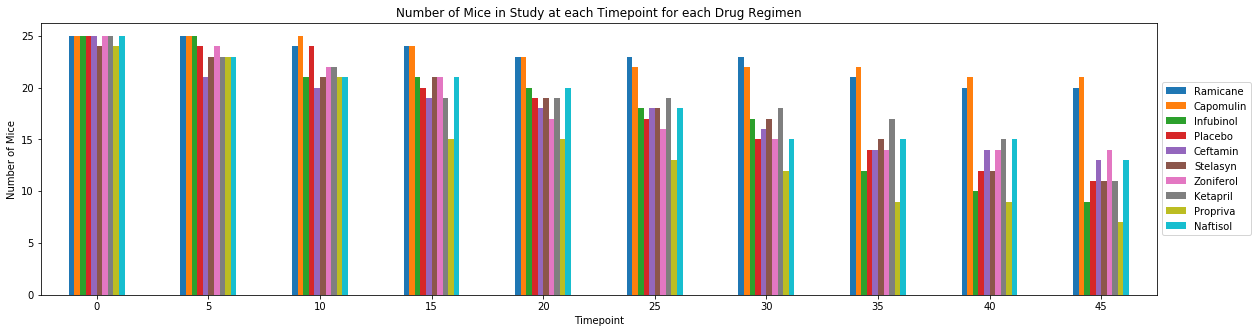

<Figure size 432x288 with 0 Axes>

In [101]:
#This creates the pandas plot bar graph

# Pandas can plot multiple columns if the DataFrame includes them
multi_plot = Bar_using_Pandas_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(dropped_dup_df["Timepoint"], rotation=0)

# Add labels to X and Y axes, the title, and the legend
plt.ylabel("Number of Mice")
plt.xlabel("Timepoint")
plt.title("Number of Mice in Study at each Timepoint for each Drug Regimen")

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
plt.tight_layout()

#Saves Bar Chart to File
plt.savefig("./Chart-Images/BarFromPandas.png")

In [102]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

Text(0.5, 1.0, 'Number of Mice in Study at each Timepoint for each Drug Regimen')

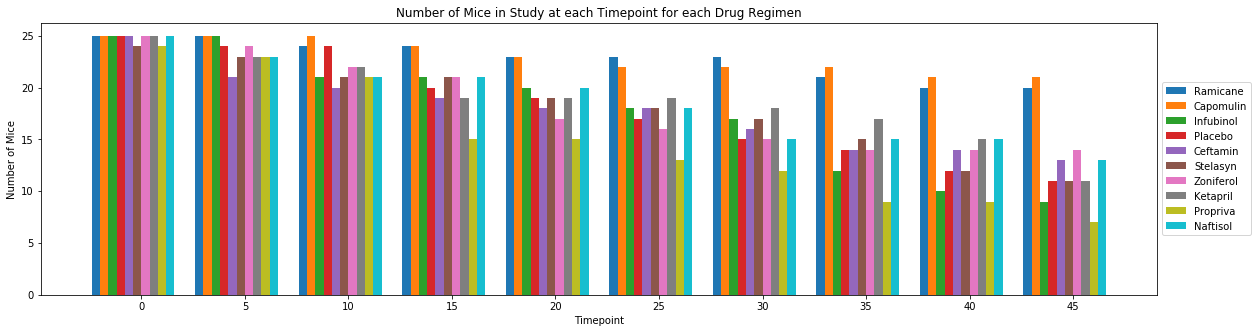

In [103]:
#To make this work with just the pyplot module like the instructions want, I made a bunch of overlapping subplots
fig, ax = plt.subplots(figsize=(20,5))

#This places the bars next to each other instead of overlapping
w=.4

plt.xticks(x_axis)
bar_d1 =plt.bar(x_axis-2.4, d1_y_axis, alpha=1, align="edge", width=w, label=d1)
bar_d2 =plt.bar(x_axis-2, d2_y_axis, alpha=1, align="edge", width=w, label=d2)
bar_d3 =plt.bar(x_axis-1.6, d3_y_axis, alpha=1, align="edge", width=w, label=d3)
bar_d4 =plt.bar(x_axis-1.2, d4_y_axis, alpha=1, align="edge", width=w, label=d4)
bar_d5 =plt.bar(x_axis-.8, d5_y_axis, alpha=1, align="edge", width=w, label=d5)
bar_d6 =plt.bar(x_axis-.4, d6_y_axis, alpha=1, align="edge", width=w, label=d6)
bar_d7 =plt.bar(x_axis-0, d7_y_axis, alpha=1, align="edge", width=w, label=d7)
bar_d8 =plt.bar(x_axis+.4, d8_y_axis, alpha=1, align="edge", width=w, label=d8)
bar_d9 =plt.bar(x_axis+.8, d9_y_axis, alpha=1, align="edge", width=w, label=d9)
bar_d10 =plt.bar(x_axis+1.2, d10_y_axis, alpha=1, align="edge", width=w, label=d10)

# Add labels to X and Y axes, the title, and the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Number of Mice")
plt.xlabel("Timepoint")
plt.title("Number of Mice in Study at each Timepoint for each Drug Regimen")

In [104]:
#Saves Bar Chart to File
plt.tight_layout()
plt.savefig("./Chart-Images/BarFromPandas.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [105]:
#Start of section for pie charts
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [106]:
# Creates a series with the number of each sex

# This creates a DataFrame with one row per mouse by dropping all but one row per mouse/ID.
individual_mice_df = dropped_dup_df.drop_duplicates("Mouse ID")


In [107]:
#NOTE: This does not include the mouse that we were told to remove earlier in the instructions
sex_dist_series=individual_mice_df["Sex"].value_counts()
sex_dist_series

Male      125
Female    123
Name: Sex, dtype: int64

In [108]:
#NOTE: This overwrites the sex count above to guse the original data set before the mouse that we were told to remove earlier in the instructions was removed
#This is done to be in alignment with the posted answers on Slack

individual_mice_df = comb_df.drop_duplicates("Mouse ID")
sex_dist_series=individual_mice_df["Sex"].value_counts()
sex_dist_series

Male      125
Female    124
Name: Sex, dtype: int64

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Putting series together to make the appropriate data frame to use Pandas plot
Pie_using_Pandas_df=pd.DataFrame(sex_dist_series)

In [110]:
Pie_using_Pandas_df

,Sex
Male,125
Female,124


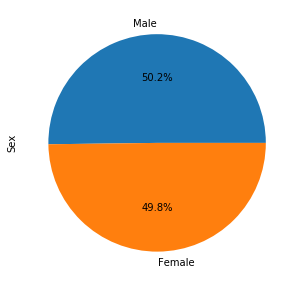

In [111]:
#This is to remove the odd looking legend and label, as well as make the chart

Pie_using_Pandas_df.plot(kind="pie", subplots=True, figsize=(20,5), autopct='%1.1f%%', legend="")
# Save an image of our chart and print the final product to the screen
plt.savefig("./Chart-Images/PandaPie.png")
plt.show()

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Creates a list for the sex and amounts
sex_name = Pie_using_Pandas_df.index.values.tolist()
sex_count = Pie_using_Pandas_df["Sex"]

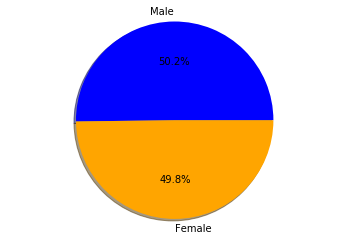

In [113]:
#Set colors to match the method above
# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sex_count, labels=sex_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("./Chart-Images/PyPie.png")
plt.show()

In [114]:
#* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#This captures all final timepoint rows that each mouse made it to
final_tumor=dropped_dup_df.copy()
final_tumor.sort_values(by=['Timepoint'])
final_tumor.drop_duplicates(subset ="Mouse ID", 
                     keep = 'last', inplace = True, ignore_index = True) 

In [115]:
#* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
best_four_final_tumor=final_tumor.loc[(final_tumor["Drug Regimen"]==d1)|(final_tumor["Drug Regimen"]==d2)|(final_tumor["Drug Regimen"]==d3)|(final_tumor["Drug Regimen"]==d5)]

In [116]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Note: The four most promising drug regimen's were given in the ReadMe file

Ramicane_df=best_four_final_tumor.loc[(best_four_final_tumor["Drug Regimen"]==d1)]
Capolulin_df=best_four_final_tumor.loc[(best_four_final_tumor["Drug Regimen"]==d2)]
Infubinol_df=best_four_final_tumor.loc[(best_four_final_tumor["Drug Regimen"]==d3)]
Ceftamin_df=best_four_final_tumor.loc[(best_four_final_tumor["Drug Regimen"]==d5)]

In [117]:
def drug_quartiles_report(drug_name, drug_df):
    
    drug_df_tumor = drug_df["Tumor Volume (mm3)"]
    quartiles = drug_df_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_df_tumor[(drug_df_tumor>upper_bound)|(drug_df_tumor<lower_bound)]

    print(f"{drug_name}:")
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")


    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if not outliers.empty:
        print(f"Specifically, the following index locations and tumor sizes in this data are possible outliers: {outliers}")
    elif outliers.empty:
        print(f"No outliers found")
    print(f"")

In [118]:
#Report for quartiles, IQR, outliers, etc.

drug_quartiles_report("Ramicane", Ramicane_df)
drug_quartiles_report("Capolulin", Capolulin_df)
drug_quartiles_report("Infubinol", Infubinol_df)
drug_quartiles_report("Ceftamin", Ceftamin_df)

Ramicane:
The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No outliers found

Capolulin:
The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No outliers found

Infubinol:
The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers

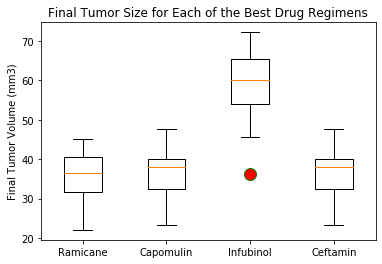

In [119]:
#Boxplot using Matplotlib

#This line is to make the lables to the x-axis tick labels
best_drug_labels = best_four_final_tumor["Drug Regimen"].unique()

#This line is to define what the outliers look like
outerlier_look = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')

Ramicane_tumor = Ramicane_df["Tumor Volume (mm3)"]
Capolulin_tumor = Capolulin_df["Tumor Volume (mm3)"]
Infubinol_tumor = Infubinol_df["Tumor Volume (mm3)"]
Ceftamin_tumor = Ceftamin_df["Tumor Volume (mm3)"]

#This pulls in the correct data
data = [Ramicane_tumor,Capolulin_tumor,Infubinol_tumor,Capolulin_tumor]

#This creates the chart itself
fig1, ax1 = plt.subplots()
ax1.set_title(f"Final Tumor Size for Each of the Best Drug Regimens")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=outerlier_look)
plt.xticks(range(1,5),best_drug_labels)
plt.show()

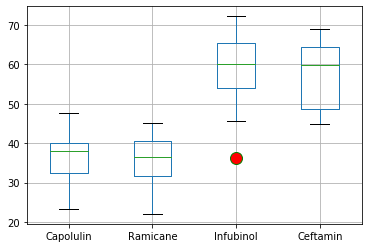

In [120]:
# Using Pandas for practice

Ramicane_tumor = Ramicane_tumor.reset_index()
Capolulin_tumor = Capolulin_tumor.reset_index()
Infubinol_tumor = Infubinol_tumor.reset_index()
Ceftamin_tumor = Ceftamin_tumor.reset_index()

del Ramicane_tumor["index"]
del Capolulin_tumor["index"] 
del Infubinol_tumor["index"]
del Ceftamin_tumor["index"] 

Ramicane_tumor = Ramicane_tumor.iloc[:,0]
Capolulin_tumor = Capolulin_tumor.iloc[:,0]
Infubinol_tumor = Infubinol_tumor.iloc[:,0]
Ceftamin_tumor = Ceftamin_tumor.iloc[:,0]

Best_Four_Tumor_Size_df=pd.DataFrame({"Capolulin":Capolulin_tumor, "Ramicane":Ramicane_tumor, "Infubinol":Infubinol_tumor, "Ceftamin":Ceftamin_tumor})
Best_Four_Tumor_Size_df.boxplot(flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g'))

In [121]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#First, finding a mouse treating with Capomulin until timepoint 45
#d2_df was previously defined as being just Capomulin
Capolulin_mice_at_45=d2_df.loc[d2_df["Timepoint"]==45,:]

#Pulls ID of a Capolulin mouse that made it to timepoint 45 that matches recommendation
Capolulin_ex_mouse=Capolulin_mice_at_45.iloc[18,0]

In [122]:
Capolulin_ex_mouse

'l509'

In [123]:
#This pulls just the data that we want for the graphs

Cap_graph_data=d2_df.loc[d2_df["Mouse ID"]==Capolulin_ex_mouse,:]

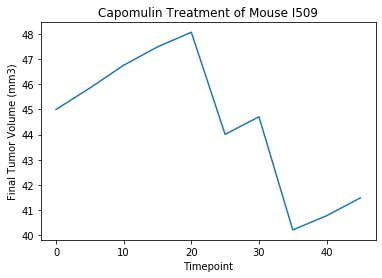

In [124]:
#Line Graph

ax = plt.gca()
Cap_graph_data.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',ax=ax,legend=None)
ax.set_title(f"Capomulin Treatment of Mouse I509")
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

In [125]:
cap_weight_ave_tumor=d2_df.groupby(['Mouse ID']).mean()

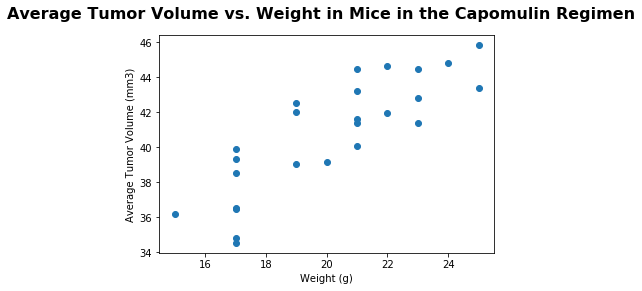

In [126]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Get approprate data here - not the d2_df is only Capomulin data from above
cap_weight_ave_tumor=d2_df.groupby(['Mouse ID']).mean()

#Makes scatterplot
plt.scatter(cap_weight_ave_tumor['Weight (g)'],cap_weight_ave_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.suptitle("Average Tumor Volume vs. Weight in Mice in the Capomulin Regimen", fontsize=16, fontweight="bold")
plt.show()

In [127]:
# * Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

#This gives the Person's correlations coefficient
correlation = st.pearsonr(cap_weight_ave_tumor['Weight (g)'],cap_weight_ave_tumor['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [128]:
# This performs a linear regression on weight versus averagetumor volume
WeightTumor_slope, WeightTumor_intercept, WeightTumor_r, WeightTumor_p, WeightTumor_std_err = st.linregress(cap_weight_ave_tumor['Weight (g)'],cap_weight_ave_tumor['Tumor Volume (mm3)'])

In [129]:
# Create equation of line to calculate from linear regression
WeightTumor_fit = WeightTumor_slope * cap_weight_ave_tumor['Weight (g)'] + WeightTumor_intercept

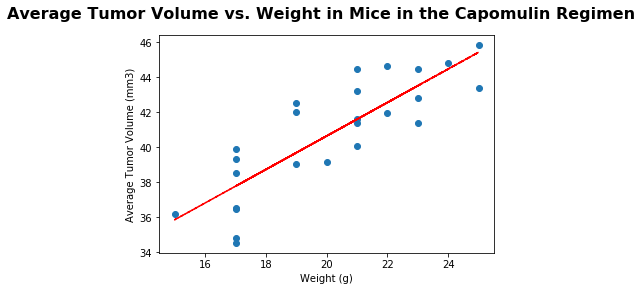

The correlation between both factors is 0.84


In [134]:
#Makes scatterplot
plt.scatter(cap_weight_ave_tumor['Weight (g)'],cap_weight_ave_tumor['Tumor Volume (mm3)'])
plt.plot(cap_weight_ave_tumor['Weight (g)'],WeightTumor_fit,"--",color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.suptitle("Average Tumor Volume vs. Weight in Mice in the Capomulin Regimen", fontsize=16, fontweight="bold")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")